In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
amzn = pd.read_csv("Amazon_data.csv",parse_dates=['Date'],index_col=['Date'])

In [3]:
amzn.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-07-16,$3573.63,4043706,$3633.31,$3646.0599,$3570.455
2021-07-15,$3631.2,3185292,$3694.2,$3695.4,$3620.92
2021-07-14,$3681.68,3296568,$3708.85,$3717.66,$3660.8266
2021-07-13,$3677.36,3845917,$3702.1,$3773.0782,$3671.32
2021-07-12,$3718.55,2571635,$3744,$3757.2899,$3696.7929


In [4]:
amzn.tail()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2016-07-22,$744.86,2259345,$747.79,$751.28,$743.53
2016-07-21,$744.43,2315367,$747.5,$749.36,$742.7918
2016-07-20,$745.72,2192779,$744,$746.25,$740.7
2016-07-19,$739.95,2210751,$732.5,$743.33,$732.31
2016-07-18,$736.07,2952099,$735.49,$741.5954,$728.72


In [5]:
amzn.isnull().sum()

Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [6]:
amzn.dtypes

Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object

In [7]:
amzn.describe()

,Volume
count,1.259000e+03
mean,4.292287e+06
std,2.069553e+06
min,8.813370e+05
25%,2.896785e+06
50%,3.701242e+06
75%,5.115248e+06
max,1.654795e+07


In [8]:
amzn.sort_index(inplace=True)

## Data Cleaning

In [9]:
#removing the '$' sign
for i in amzn[['Close/Last','Open','High','Low']]:
    amzn[i] =amzn[i].map(lambda x:x.replace('$',"")).astype(float)

In [10]:
amzn.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2016-07-18,736.07,2952099,735.49,741.5954,728.7200
2016-07-19,739.95,2210751,732.50,743.3300,732.3100
2016-07-20,745.72,2192779,744.00,746.2500,740.7000
2016-07-21,744.43,2315367,747.50,749.3600,742.7918
2016-07-22,744.86,2259345,747.79,751.2800,743.5300


In [11]:
amzn.dtypes

Close/Last    float64
Volume          int64
Open          float64
High          float64
Low           float64
dtype: object

In [12]:
# rounding off to two decimal points
amzn = round(amzn,2)

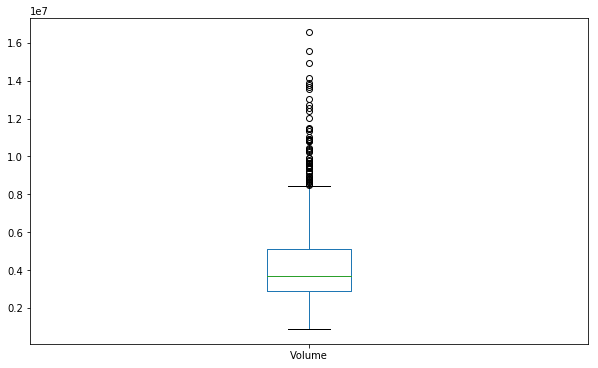

In [13]:
amzn['Volume'].plot(kind='box',figsize=(10,6))

### Outliers in volume data

In [14]:
#to check the correlation
amzn.corr()

,Close/Last,Volume,Open,High,Low
Close/Last,1.000000,0.061855,0.999276,0.999654,0.999671
Volume,0.061855,1.000000,0.064036,0.072706,0.051556
Open,0.999276,0.064036,1.000000,0.999700,0.999599
High,0.999654,0.072706,0.999700,1.000000,0.999518
Low,0.999671,0.051556,0.999599,0.999518,1.000000


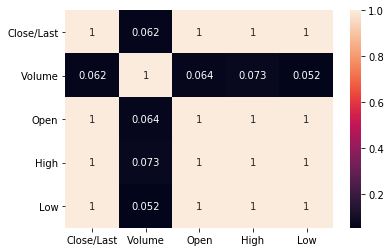

In [15]:
sns.heatmap(amzn.corr(),annot=True)

### Here we can see that there is very less correlation with volume and also there are outliers so we can drop the 'Volume' column

In [16]:
amzn_cleaned=amzn.drop(columns=['Volume'])

In [17]:
amzn_cleaned.head()

,Close/Last,Open,High,Low
Date,,,,
2016-07-18,736.07,735.49,741.60,728.72
2016-07-19,739.95,732.50,743.33,732.31
2016-07-20,745.72,744.00,746.25,740.70
2016-07-21,744.43,747.50,749.36,742.79
2016-07-22,744.86,747.79,751.28,743.53


In [18]:
amzn_cleaned.max()

Close/Last    3731.41
Open          3744.00
High          3773.08
Low           3696.79
dtype: float64

In [19]:
amzn_cleaned.min()

Close/Last    719.07
Open          730.00
High          740.94
Low           710.10
dtype: float64

In [20]:
amzn_cleaned[amzn_cleaned['Close/Last']==amzn_cleaned['Close/Last'].max()]

,Close/Last,Open,High,Low
Date,,,,
2021-07-08,3731.41,3643.56,3759.99,3621.12


### Maximum closing on '2021-07-08' with price $3731.41

In [21]:
amzn_cleaned[amzn_cleaned['Close/Last']==amzn_cleaned['Close/Last'].min()]

,Close/Last,Open,High,Low
Date,,,,
2016-11-14,719.07,745.51,746.0,710.1


### Minimum closing on '2016-11-14' with price $719.07

In [22]:
amzn_cleaned.var()

Close/Last    704564.348831
Open          706358.587039
High          724404.252114
Low           686486.542321
dtype: float64

## Ploting

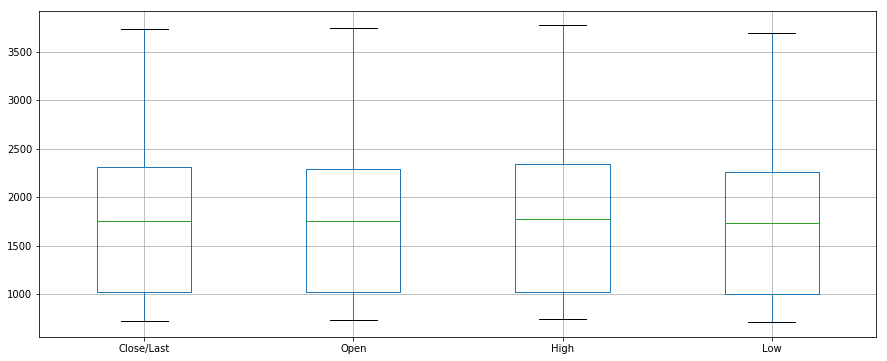

In [23]:
amzn_cleaned.boxplot(figsize=(15,6))

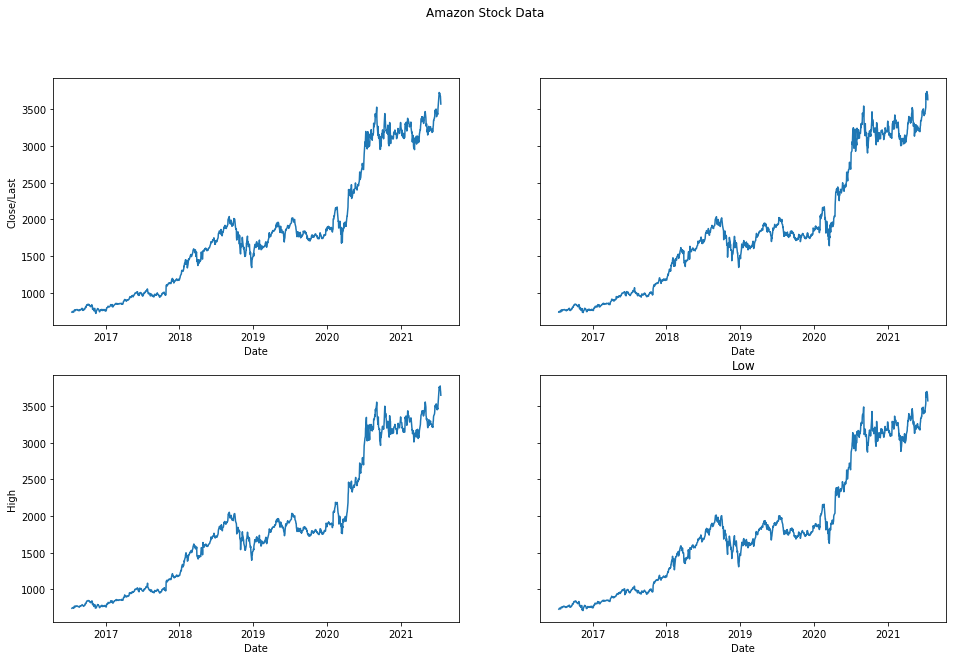

In [24]:
fig, axes = plt.subplots(2, 2,figsize=(16,10), sharey=True)
fig.suptitle('Amazon Stock Data')


sns.lineplot(ax=axes[0,0], x=amzn_cleaned.index, y=amzn_cleaned['Close/Last'])
plt.title('Close/last')

sns.lineplot(ax=axes[0,1], x=amzn_cleaned.index, y=amzn_cleaned['Open'])
plt.title('Open')

sns.lineplot(ax=axes[1,0], x=amzn_cleaned.index, y=amzn_cleaned['High'])
plt.title('High')

sns.lineplot(ax=axes[1,1], x=amzn_cleaned.index, y=amzn_cleaned['Low'])
plt.title('Low')

plt.show()

In [25]:
#using plotly for attractive visualization
from plotly.offline import iplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly as py
import plotly.tools as tls
import cufflinks as cf

In [26]:
py.offline.init_notebook_mode(connected=True)

In [27]:
cf.go_offline()

In [28]:
amzn_cleaned.iplot(kind='box')


In [29]:
amzn_cleaned.iplot(title='Amazon Stock Data')

In [30]:
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Close/Last", "Open", "High", "Low"))

fig.add_trace(go.Scatter(x=amzn_cleaned.index, y=amzn_cleaned['Close/Last'],name='Close/Last'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=amzn_cleaned.index, y=amzn_cleaned['Open'],name='Open'),
              row=1, col=2)

fig.add_trace(go.Scatter(x=amzn_cleaned.index, y=amzn_cleaned['High'],name='High'),
              row=2, col=1)

fig.add_trace(go.Scatter(x=amzn_cleaned.index, y=amzn_cleaned['Low'],name='Low'),
              row=2, col=2)

fig.update_layout(height=800, width=1000,
                  title_text="Amazon Stock Data")

fig.show()

## Modeling

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from math import sqrt

In [32]:
scaler=MinMaxScaler(feature_range=(0,1))

In [33]:
X1= amzn_cleaned.iloc[:,1:4]

In [34]:
y=amzn['Close/Last']

In [35]:
X=scaler.fit_transform(X1)

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [37]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((881, 3), (378, 3), (881,), (378,))

In [38]:
lnr= LinearRegression()

In [39]:
model=lnr.fit(X_train,y_train)

In [40]:
y_pred=model.predict(X_test)

In [41]:
r2_score(y_test,y_pred)

0.9996859313041478

In [42]:
r2_score(y_train,model.predict(X_train))

0.9997527349172811

In [43]:
sqrt(mean_squared_error(y_test,y_pred))


14.416197336859556

In [44]:
sqrt(mean_squared_error(y_train,model.predict(X_train)))


13.35760779310443

In [45]:
#using 30% of data for validaton
train_data = amzn_cleaned[:881]
valid_data = amzn_cleaned[881:]

In [46]:
xtrain = train_data.drop('Close/Last', axis=1)
ytrain = train_data['Close/Last']
xtest = valid_data.drop('Close/Last', axis=1)
ytest = valid_data['Close/Last']

#scaler transformation
xtrain_scaled = scaler.fit_transform(xtrain)
x_train=pd.DataFrame(xtrain_scaled)
xtest_scaled = scaler.fit_transform(xtest)
x_test=pd.DataFrame(xtest_scaled)

In [47]:
new_model=lnr.fit(xtrain,ytrain)

In [48]:
ypred=new_model.predict(xtest)

In [49]:
r2_score(ytest,ypred)

0.9981915886862777

In [50]:
r2_score(ytrain,new_model.predict(xtrain))

0.9996396335813047

In [51]:
sqrt(mean_squared_error(ytest,ypred))

21.88482223173948

In [52]:
sqrt(mean_squared_error(ytrain,model.predict(xtrain)))

8.146884906335284

In [53]:
valid_data['Predictions']=0
valid_data['Predictions']=ypred

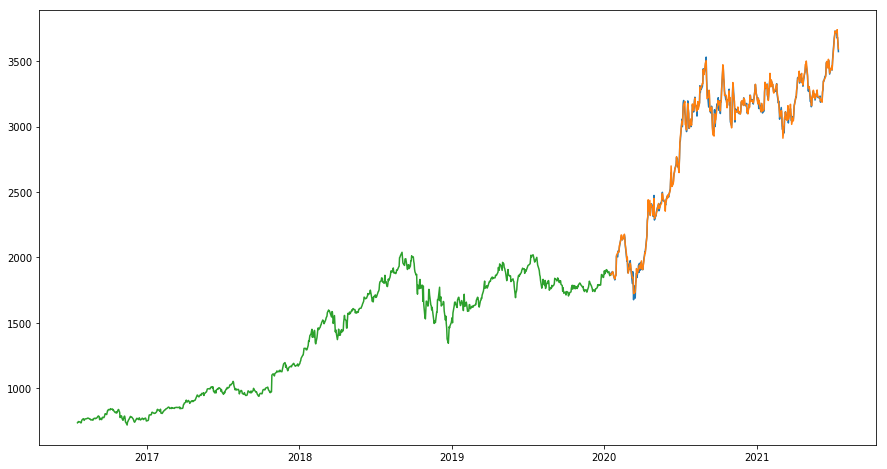

In [54]:
fig=plt.figure(figsize=(15,8))
plt.plot(valid_data[['Close/Last', 'Predictions']])
plt.plot(train_data['Close/Last'])
